

AI22BTECH11027 - Sudarshan Shivashankar

Topic chosen : Medicine and related terms.

link: https://medlineplus.gov/encyclopedia.html

In [27]:


import requests
from bs4 import BeautifulSoup
import csv
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
# Defining stopwords
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()


In [29]:
# the URL that we are using(medkineplus)
base_url = "https://medlineplus.gov/ency/encyclopedia_{}.htm"


alphabets = [chr(letter) for letter in range(ord('A'), ord('R') + 1)]

NUM_LINKS = 20

all_data = []

# Function to tokenizing and lemmatizing content
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(lemmatized_tokens)


In [30]:
for letter in alphabets:
    print(f"Processing topics for letter '{letter}'...")


    letter_url = base_url.format(letter)
    try:
        letter_response = requests.get(letter_url, timeout=20)
        letter_response.raise_for_status()
        print(f"Letter page '{letter}' fetched successfully!")
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch the letter page '{letter}'. Error: {e}")
        continue

    letter_soup = BeautifulSoup(letter_response.content, 'html.parser')
    topic_links = [
        a['href'] for a in letter_soup.find_all('a', href=True)
        if 'article' in a['href'] and a['href'].startswith('article/')
    ]
    print(f"Extracted {len(topic_links)} topic links for letter '{letter}'.")

    # Limit the number of links to process (20 per letter)
    selected_links = topic_links[:NUM_LINKS]
    data = []


    for i, topic_link in enumerate(selected_links, 1):
        topic_url = f"https://medlineplus.gov/ency/{topic_link}"
        print(f"Processing {i}/{len(selected_links)}: {topic_url}")

        try:
            topic_page = requests.get(topic_url, timeout=20)
            topic_page.raise_for_status()
            topic_soup = BeautifulSoup(topic_page.content, 'html.parser')


            title = topic_soup.find('h1').text.strip() if topic_soup.find('h1') else 'No Title'


            content = ''
            content_section = topic_soup.find('div', class_='section')
            if content_section:
                content = content_section.get_text(separator=' ', strip=True)
            else:
                paragraphs = topic_soup.find_all('p')
                content = ' '.join([p.get_text(strip=True) for p in paragraphs])


            tokens = word_tokenize(content.lower())
            filtered_content = ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])
            lemmatized_content = tokenize_and_lemmatize(filtered_content)


            data.append({
                'URL': topic_url,
                'Title': title,
                'Content': content,
                'Filtered Content': filtered_content,
                'Lemmatized Content': lemmatized_content
            })
            print(f"Fetched: {title[:50]}...")

        except requests.exceptions.RequestException as e:
            print(f"Failed to fetch topic page {topic_url}. Error: {e}")

    all_data.extend(data)


Processing topics for letter 'A'...
Letter page 'A' fetched successfully!
Extracted 327 topic links for letter 'A'.
Processing 1/20: https://medlineplus.gov/ency/article/003640.htm
Fetched: A1C test...
Processing 2/20: https://medlineplus.gov/ency/article/001654.htm
Fetched: Aarskog syndrome...
Processing 3/20: https://medlineplus.gov/ency/article/001662.htm
Fetched: Aase syndrome...
Processing 4/20: https://medlineplus.gov/ency/article/003122.htm
Fetched: Abdomen - swollen...
Processing 5/20: https://medlineplus.gov/ency/article/000162.htm
Fetched: Abdominal aortic aneurysm...
Processing 6/20: https://medlineplus.gov/ency/article/007392.htm
Fetched: Abdominal aortic aneurysm repair - open...
Processing 7/20: https://medlineplus.gov/ency/article/003123.htm
Fetched: Abdominal bloating...
Processing 8/20: https://medlineplus.gov/ency/article/003789.htm
Fetched: Abdominal CT scan...
Processing 9/20: https://medlineplus.gov/ency/article/002928.htm
Fetched: Abdominal exploration...
Processi

All data saved to 'medical_articles_A_to_R.csv'
Most Common Words: [('may', 377), ('cause', 333), ('blood', 191), ('also', 152), ('disease', 148), ('called', 146), ('body', 146), ('often', 130), ('surgery', 129), ('test', 128), ('infection', 127), ('child', 125), ('people', 116), ('cell', 116), ('pain', 106), ('common', 100), ('provider', 98), ('ear', 97), ('small', 95), ('make', 93)]


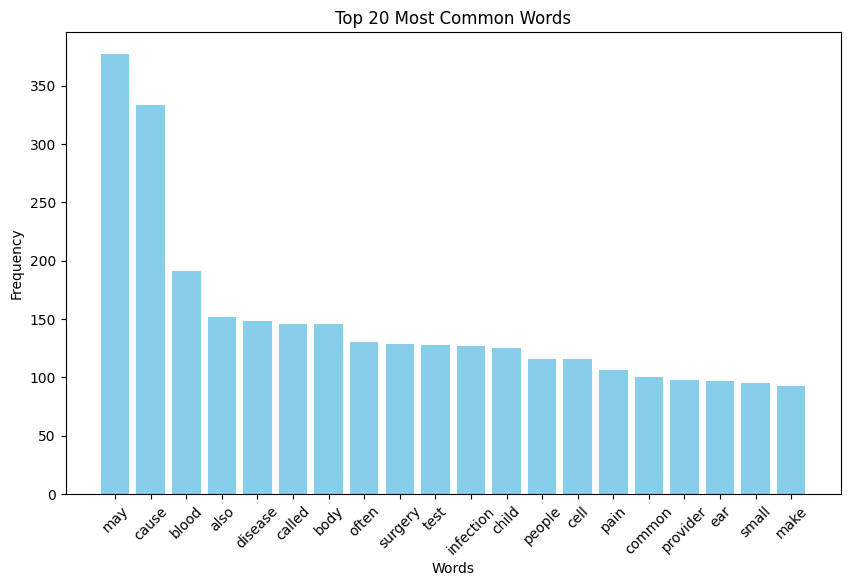

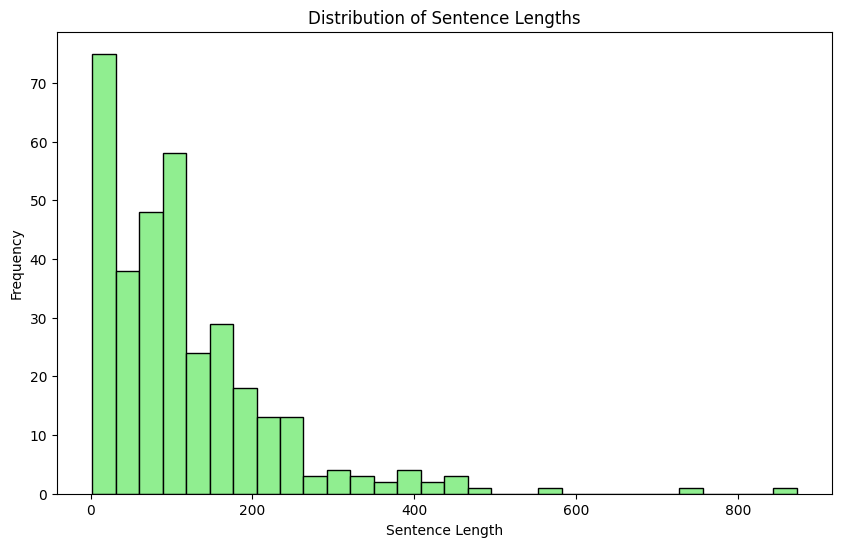

Average Word Length: 6.079024260669382
Number of Unique Words: 3820
Lexical Diversity: 0.16911634496192668


In [31]:
# Save all data to a single CSV file
csv_file = 'medical_articles_A_to_R.csv'
fieldnames = ['URL', 'Title', 'Content', 'Filtered Content', 'Lemmatized Content']

try:
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(all_data)
    print(f"All data saved to '{csv_file}'")
except Exception as e:
    print(f"Failed to save all data to CSV. Error: {e}")



data = pd.read_csv(csv_file)

all_text = ' '.join(data['Lemmatized Content'].dropna())

# Tokenizing the text
all_words = all_text.split()




# Word frequency analysis
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)
print("Most Common Words:", most_common_words)

# Bar chart of word frequencies
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()






# Sentence length distribution
data['Sentence Length'] = data['Content'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
plt.figure(figsize=(10, 6))
plt.hist(data['Sentence Length'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.show()

# Additional statistics
average_word_length = sum(len(word) for word in all_words) / len(all_words)
unique_words = len(set(all_words))
lexical_diversity = unique_words / len(all_words)

print(f"Average Word Length: {average_word_length}")
print(f"Number of Unique Words: {unique_words}")
print(f"Lexical Diversity: {lexical_diversity}")







